<a href="https://colab.research.google.com/github/pitaconsumer/Jupyter-Projects/blob/master/advanced_nlp_Twenty%20News%20Groups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Extraction Challenge
### Comparing LSA, LDA, and NNMF

#### Dataset: 20 newsgroups

#### Method:
1.  Parse and process the data into a tf-idf matrix.
2.  Fit LSA, LDA, and NNMF models with 5 topics each.
3.  Extract the words that best describe each topic.
4.  Examine the topic relationships for top words.

In [ ]:
import pandas as pd
import numpy as np
import scipy

import spacy
import nltk
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(27)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('Set2')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [ ]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(shuffle=True, remove=('headers', 'footers'))

In [ ]:
type(newsgroups)

sklearn.utils.Bunch

In [ ]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
df = pd.DataFrame(newsgroups.data, newsgroups.target).reset_index()
df.columns = ['target', 'data']
df.head()

,target,data
0,7,I was wondering if anyone out there could enli...
1,4,A fair number of brave souls who upgraded thei...
2,4,"well folks, my mac plus finally gave up the gh..."
3,1,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...
4,14,"From article <C5owCB.n3p@world.std.com>, by to..."


In [ ]:
sample_data = df.iloc[0,1]
sample_data

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [ ]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(contractions.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_tags, strip_punctuation, strip_numeric
from gensim.parsing.preprocessing import strip_multiple_whitespaces, strip_non_alphanum, remove_stopwords, strip_short

CUSTOM_FILTERS = [lambda x: x.lower(), #lowercase
                  strip_tags, # remove html tags
                  strip_punctuation, # replace punctuation with space
                  strip_multiple_whitespaces,# remove repeating whitespaces
                  strip_non_alphanum, # remove non-alphanumeric characters
                  strip_numeric, # remove numbers
                  remove_stopwords,# remove stopwords
                  strip_short # remove words less than minsize=3 characters long
                 ]
nlp = spacy.load('en')

def gensim_preprocess(docs, logging=True):
    docs = [expandContractions(doc) for doc in docs]
    docs = [preprocess_string(text, CUSTOM_FILTERS) for text in docs]
    texts_out = []
    for doc in docs:
    # https://spacy.io/usage/processing-pipelines
        doc = nlp((" ".join(doc)),  # doc = text to tokenize => creates doc
                  # disable parts of the language processing pipeline we don't need here to speed up processing
                  disable=['ner', # named entity recognition
                           'tagger', # part-of-speech tagger
                           'textcat', # document label categorizer
                          ])
        texts_out.append([tok.lemma_ for tok in doc if tok.lemma_ != '-PRON-'])
    return pd.Series(texts_out)

gensim_preprocess(df.data.iloc[10:15])

0    [line, ducati, gts, model, clock, run, paint, ...
1    [article, freenet, carleton, freenet, carleton...
2                                                   []
3    [article, kjenks, gothamcity, jsc, nasa, gov, ...
4    [reduce, price, list, thing, forsale, behalf, ...
dtype: object

In [ ]:
texts = gensim_preprocess(df.data)

In [ ]:
texts = [' '.join(text) for text in texts]
texts[0]

'wonder enlighten car see day door sport car look late early call bricklin door small addition bumper separate rest body know tellme model engine spec year production car history info funky look car mail'

In [ ]:
# sklearn tfidf
vectorizer = TfidfVectorizer()
sklearn_tfidf = vectorizer.fit_transform(texts)

# Getting the word list.
terms = vectorizer.get_feature_names()

# Number of topics.
ntopics=len(newsgroups.target_names)

# Linking words to topics
def word_topic(tfidf, solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

# Extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=chosenlist
    return(topwords)

# Number of words to look at for each topic.
n_top_words = 10

In [ ]:
def top_words(components, n_top_words=10):
  n_topics = components.shape[1]
  len_vectors = (sum([components[i]**2 for i in range(n_topics)])/n_topics)**(1/2)
  return len_vectors.sort_values(ascending=False).head(n_top_words)

In [ ]:
components_lsa['len_vectors'] = (sum([components_lsa[i]**2 for i in range(20)])/20)**(1/2)

In [ ]:
components_lsa['len_vectors'].sort_values(ascending=False).head(10)

write      33.876959
article    28.753848
edu        26.087673
know       25.119134
window     23.438915
think      22.941192
people     22.726494
like       22.680278
god        21.032934
thank      19.562509
Name: len_vectors, dtype: float64

In [ ]:
# LSA

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
%time lsa = lsa.fit_transform(sklearn_tfidf)

components_lsa = word_topic(sklearn_tfidf, lsa, terms)


topwords_lsa=top_words(components_lsa, n_top_words)                


CPU times: user 1.4 s, sys: 828 ms, total: 2.23 s
Wall time: 1.19 s


In [ ]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7,# Convergence rate.
          learning_method='online',
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=3, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.01, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=10, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=1, 
          verbose=1, # amount of output to give while iterating
         )

lda = lda.fit_transform(sklearn_tfidf) 

components_lda = word_topic(sklearn_tfidf, lda, terms)

topwords_lda=top_words(components_lda, n_top_words)


iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3


In [ ]:
# NNMF

from sklearn.decomposition import NMF

nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=100, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=1 # amount of output to give while iterating
         )
nmf = nmf.fit_transform(sklearn_tfidf) 

components_nmf = word_topic(sklearn_tfidf, nmf, terms)

topwords_nnmf=top_words(components_nmf, n_top_words)

violation: 1.0
violation: 0.2283773612569999
violation: 0.1382638596839118
violation: 0.08107496513051468
violation: 0.05080667757632899
violation: 0.03464636006394643
violation: 0.024825227652870614
violation: 0.018376661742979413
violation: 0.013989073195384838
violation: 0.010838488069557865
violation: 0.008549944960634685
violation: 0.006875703740423915
violation: 0.0056233919409456
violation: 0.004666763798720343
violation: 0.003921254291026291
violation: 0.0033273621090673497
violation: 0.00284673392733114
violation: 0.002424418029746373
violation: 0.002076804636071452
violation: 0.0017911805710053006
violation: 0.0015530654461051638
violation: 0.001353477223160911
violation: 0.0011855481211926263
violation: 0.001046366670048577
violation: 0.0009292235501796375
violation: 0.0008307798042798073
violation: 0.0007476936570654291
violation: 0.0006773659076018604
violation: 0.0006180674371085537
violation: 0.0005684532479927267
violation: 0.0005264726577142192
violation: 0.00049057658

In [ ]:
topwords_lsa.name = 'LSA'
topwords_lda.name = 'LDA'
topwords_nnmf.name = 'NNMF'

In [ ]:
topwords = pd.concat([topwords_lda, topwords_lsa, topwords_nnmf], axis='columns')

In [ ]:
len(newsgroups.target_names)

20

NameError: ignored

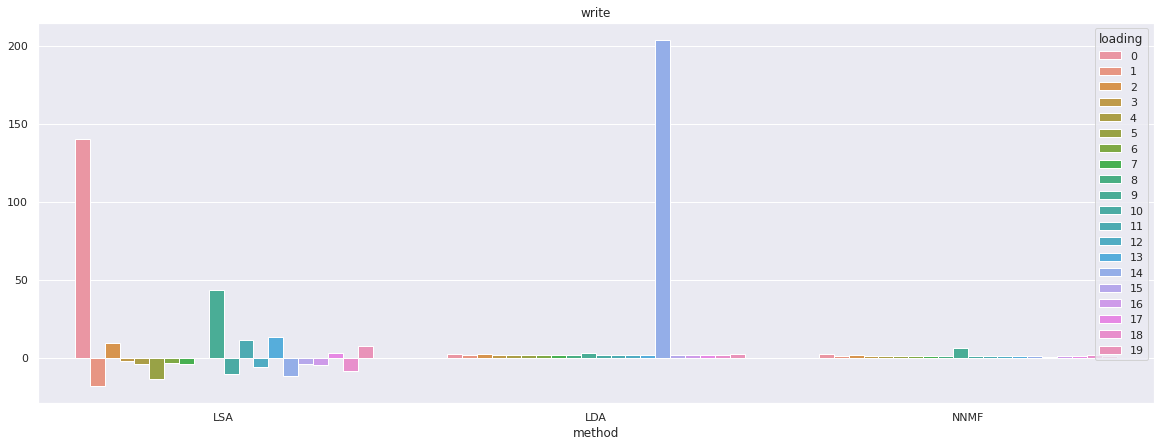

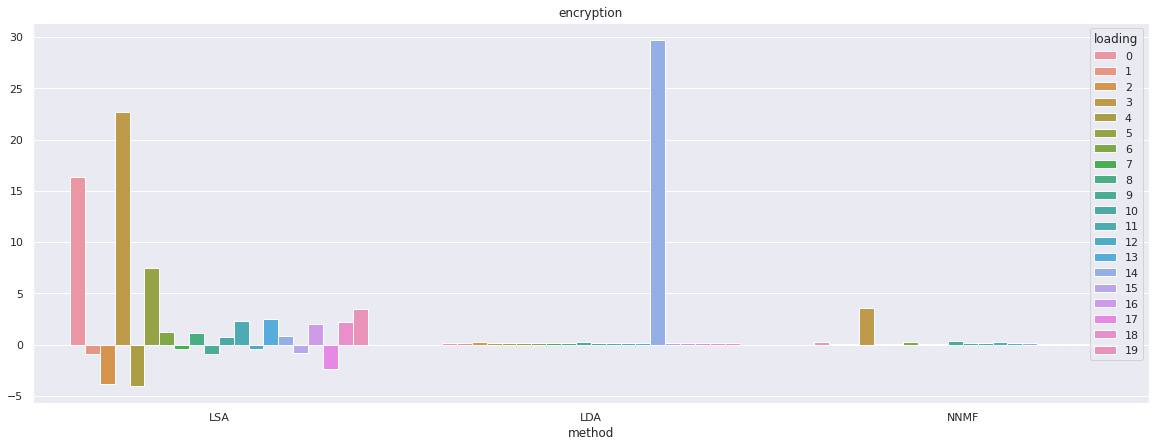

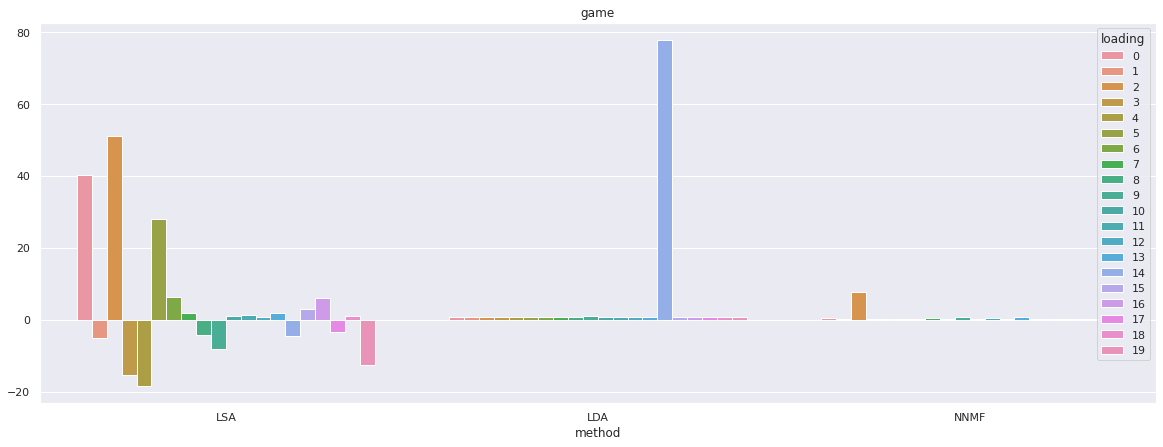

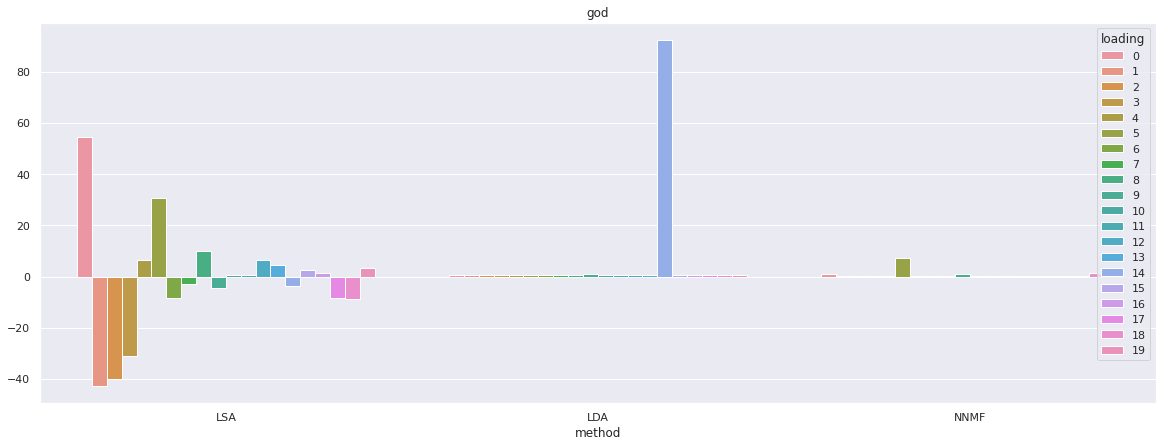

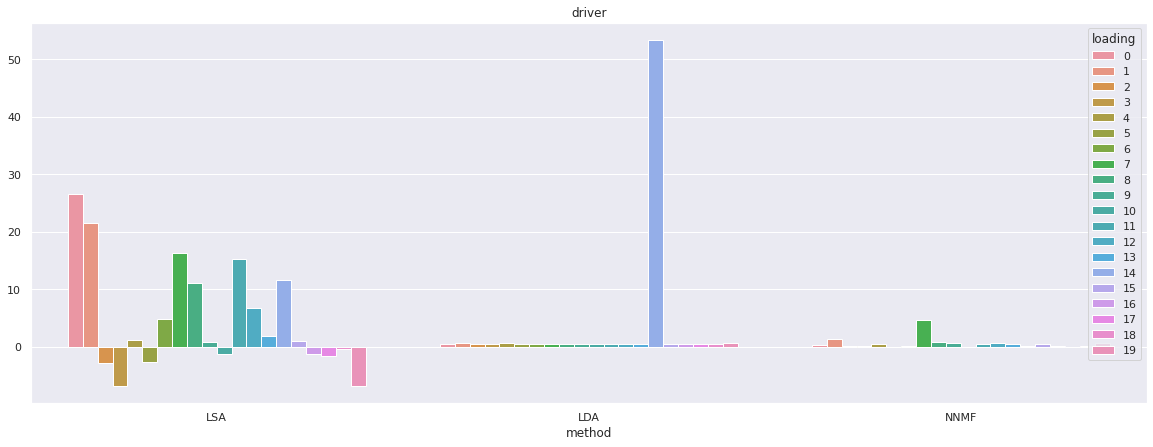

In [ ]:
# The words to look at.
targetwords=['write','encryption','game', 'god', 'driver']

# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

# For each word, extracting and string the loadings for each method.
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

# Labeling the data by method and providing an ordering variable for graphing purposes. 
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], len(newsgroups.target_names), axis=0)
wordloadings['loading']=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]*3

sns.set(style="darkgrid")

for word in targetwords:
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

LSA is the method most likely to have high loadings on more than one topic for the same word. LDA tends to have one high loading and some lower loadings. Loadings for NNMF are lower all around, and the most sparse, with some of the topics having loadings of zero on each word.

According to [NLP for Hackers](https://nlpforhackers.io/topic-modeling/) topic modeling is:

 - Dimensinality Reduction - We reduce dimensionality by representing a text in its topic space instead of its word space.
 - Unsupervised Learning - Topic modeling is similar to clustering.
 - A Form of Tagging - Topic modeling applys multiple tags to a text. (Similar to the tags applied to this kernel above!)

Topic modeling is useful for many situations, including text classification.